Importing necessary libraries

In [2]:
import numpy as np 
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [3]:
# Import data 
df= pd.read_excel(r'C:\Users\hp\OneDrive\Prodigy Infotech Internship\TASK03\Bank_info.xlsx')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y variable
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
3,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
4,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [4]:
# Data preprocessing/cleaning
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y variable'],
      dtype='object')

In [5]:
# Drop unecessary columns
df.drop(['contact','poutcome'],axis=1,inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y variable
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
2,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
3,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
4,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no


In [6]:
#Check for sum of missing values.
missing_values= df.isnull().sum()
print(missing_values)

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
y variable    0
dtype: int64


In [7]:
# Check duplicate values and drop
df.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y variable
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
197,50,technician,divorced,tertiary,no,173,no,yes,5,may,98,1,-1,0,no
198,43,management,married,tertiary,no,400,yes,no,5,may,256,1,-1,0,no
199,61,blue-collar,divorced,primary,no,1428,yes,no,5,may,82,2,-1,0,no
200,47,admin.,married,secondary,no,219,yes,no,5,may,577,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0,no


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.992148,1369.333193,15.806419,257.996550,2.762867,40.197828,0.580323
std,10.653529,3043.256204,8.322476,256.716591,3.098346,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,75.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,456.000000,16.000000,181.000000,2.000000,-1.000000,0.000000
75%,48.000000,1457.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  int64 
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   day         45211 non-null  int64 
 9   month       45211 non-null  object
 10  duration    45211 non-null  int64 
 11  campaign    45211 non-null  int64 
 12  pdays       45211 non-null  int64 
 13  previous    45211 non-null  int64 
 14  y variable  45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y variable
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
2,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
3,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
4,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no


In [11]:
#Data encoding of categorical values
data_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'month'], drop_first=True)

In [12]:
# Define feature columns and target columns
X = data_encoded.drop(columns=['y variable'])
y = data_encoded['y variable']

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (31647, 37)
X_test shape: (13564, 37)
y_train shape: (31647,)
y_test shape: (13564,)


In [14]:
# Train using Gini Impurity
def train_using_gini(X_train, y_train):
    clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [15]:
 #Function to make predictions
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)  # Print predicted values
    return y_pred


In [16]:
# Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
    print("Classification Report:\n", classification_report(y_test, y_pred))

In [17]:
# Train the model
clf_gini = train_using_gini(X_train, y_train)

# Make predictions
y_pred_gini = prediction(X_test, clf_gini)

# Evaluate the model
cal_accuracy(y_test, y_pred_gini)

Predicted values:
['no' 'no' 'no' ... 'no' 'no' 'no']
Confusion Matrix:
 [[11753   215]
 [ 1314   282]]
Accuracy: 88.72751400766735
Classification Report:
               precision    recall  f1-score   support

          no       0.90      0.98      0.94     11968
         yes       0.57      0.18      0.27      1596

    accuracy                           0.89     13564
   macro avg       0.73      0.58      0.60     13564
weighted avg       0.86      0.89      0.86     13564



In [18]:
# Function to plot the decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

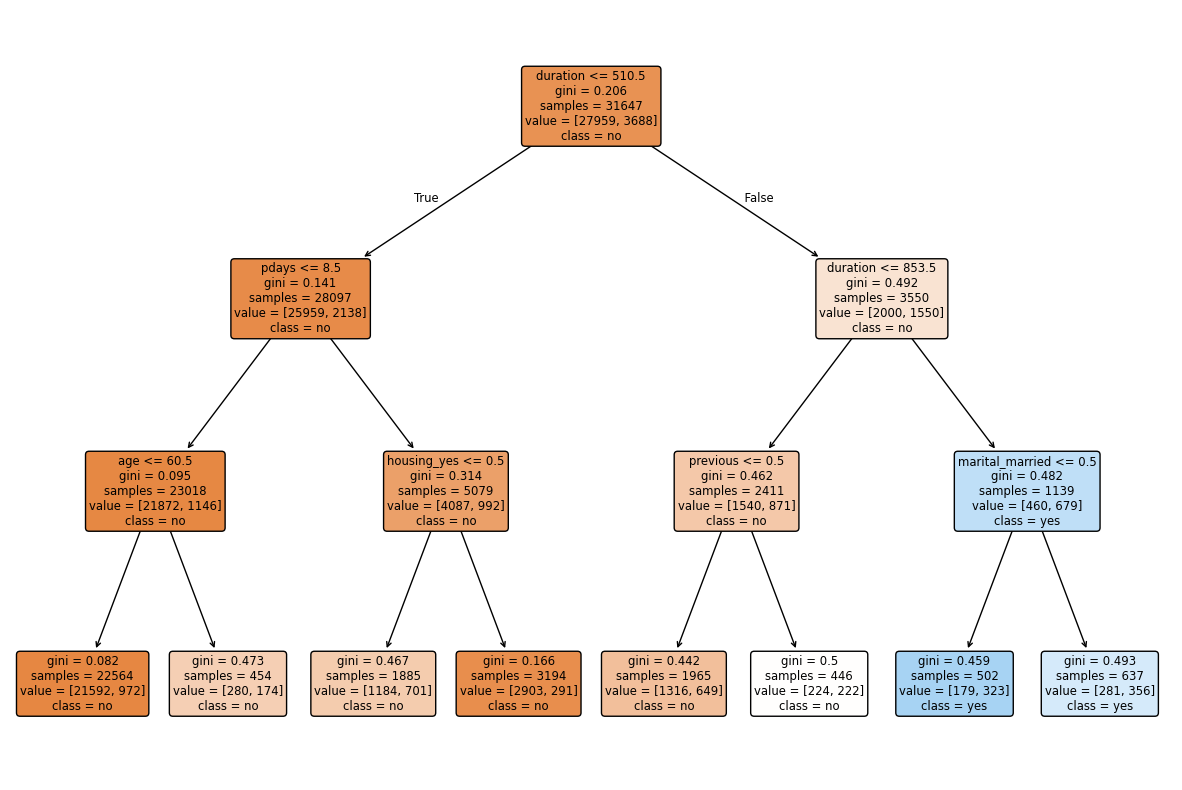

Results Using Gini Index:
Predicted values:
['no' 'no' 'no' ... 'no' 'no' 'no']
Confusion Matrix:
 [[11753   215]
 [ 1314   282]]
Accuracy: 88.72751400766735
Classification Report:
               precision    recall  f1-score   support

          no       0.90      0.98      0.94     11968
         yes       0.57      0.18      0.27      1596

    accuracy                           0.89     13564
   macro avg       0.73      0.58      0.60     13564
weighted avg       0.86      0.89      0.86     13564



In [19]:
# Train the model
clf_gini = train_using_gini(X_train, y_train)

# Visualize the decision tree (Using Gini)
plot_decision_tree(clf_gini, X.columns, y.unique())

# Operational Phase
print("Results Using Gini Index:")
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)